In [1]:
from os import path
import sys
sys.path.append(path.abspath('..'))

In [2]:
import os
import cv2
import base64
from PIL import Image
import numpy as np
import requests
from pprint import pprint
import pandas as pd
import base64
import io
import matplotlib.pyplot as plt
from service.core.zoo import ModelZoo

In [16]:
DATA_FOLDER = '/mnt/d/amazonia/data/train-jpg'
df = pd.read_csv("/mnt/d/amazonia/data/"+'/valid_df.csv')

In [17]:
df

image_name  agriculture  artisinal_mine  bare_ground  blooming  \
0         train_0            0               0            0         0   
1         train_6            1               0            0         0   
2        train_11            0               0            0         0   
3        train_12            0               0            0         0   
4        train_15            0               0            0         0   
...           ...          ...             ...          ...       ...   
4084  train_36902            1               0            0         0   
4085  train_37842            0               0            1         0   
4086  train_38720            0               0            1         0   
4087  train_39128            1               0            0         0   
4088  train_39797            1               0            0         0   

      blow_down  clear  cloudy  conventional_mine  cultivation  habitation  \
0             0      0       0                  0            0           0   
1             0      1       0                  0            1           0   
2             0      1       0                  0            0           0   
3             0      0       1                  0            0           0   
4             0      1       0                  0            0           0   
...         ...    ...     ...                ...          ...         ...   
4084          0      0       0                  0            0           0   
4085          0      0       0                  0            0           0   
4086          0      0       0                  0            0           0   
4087          0      0       0                  0            0           0   
4088          0      0       0                  0            0           1   

      haze  partly_cloudy  primary  road  selective_logging  slash_burn  water  
0        1              0        1     0                  0           0      0  
1        0              0        1     0                  0           0      1  
2        0              0        1     0                  0           0      1  
3        0              0        0     0                  0           0      0  
4        0              0        1     0                  0           0      0  
...    ...            ...      ...   ...                ...         ...    ...  
4084     0              1        0     0                  0           0      1  
4085     0              1        1     0                  0           0      0  
4086     1              0        0     0                  0           0      0  
4087     0              1        0     0                  0           0      1  
4088     0              1        0     1                  0           0      0  

[4089 rows x 18 columns]

In [18]:
fname

'/mnt/d/amazonia/data/train_400.jpg'

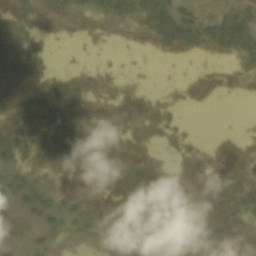

In [19]:
idx = 100
fname = os.path.join(DATA_FOLDER, f'{df["image_name"][idx]}.jpg')
image = cv2.imread(fname)[..., ::-1]
Image.fromarray(image)

In [20]:
# кодируем изображение
flag, image_encoded = cv2.imencode('.png', image)
image_encoded = image_encoded.tobytes()

In [25]:
# predict
url = 'http://0.0.0.0:5000/predict'

response = requests.post(url, data=image_encoded)

In [26]:
print(response.text)

{"tags":["clear","primary"]}



In [31]:
# predict_proba
url = 'http://0.0.0.0:5000/predict_proba'

response = requests.post(url, data=image_encoded)

In [32]:
dict(sorted(response.json().items(), key=lambda x: x[1], reverse=True))

{'primary': 0.9638965725898743,
 'clear': 0.7597704529762268,
 'agriculture': 0.27298545837402344,
 'road': 0.15630663931369781,
 'water': 0.15054699778556824,
 'partly_cloudy': 0.13424454629421234,
 'cultivation': 0.09475941210985184,
 'habitation': 0.05826903507113457,
 'haze': 0.03257668390870094,
 'cloudy': 0.02863713912665844,
 'bare_ground': 0.020996753126382828,
 'slash_burn': 0.013595310039818287,
 'blooming': 0.01351399440318346,
 'artisinal_mine': 0.013491489924490452,
 'selective_logging': 0.012781243771314621,
 'conventional_mine': 0.011282242834568024,
 'blow_down': 0.010385863482952118}